In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from nuforc_csv_to_pandas import scrub
%matplotlib inline

#Read in UFO CSV file as a dataframe
ufo_data = scrub()

#Display headers when done loading
ufo_data.head()

,Date_Time,City,State,Shape,Duration,Summary,Posted,Duration_Mins,Year,Month,Day_Of_Month,Day_Of_Week,Timestamp
0,2021-05-19 20:15:00,atlanta,GA,sphere,10 min,Two black UFO over Atlanta one coming close to...,2021-05-20,10.0,2021,5,19,Wednesday,20:15:00
1,2021-05-19 17:25:00,glens falls,NY,triangle,20 minutes,Triangular object over the Hudson River,2021-05-20,20.0,2021,5,19,Wednesday,17:25:00
2,2021-05-19 14:30:00,north haledon,NJ,other,20 mins,I’m no stranger to flying things but yesterday...,2021-05-20,20.0,2021,5,19,Wednesday,14:30:00
3,2021-05-19 10:50:00,clarksburg,MD,triangle,1 min,Triangle ufo,2021-05-20,1.0,2021,5,19,Wednesday,10:50:00
4,2021-05-19 01:00:00,sharon connecticut,CT,light,1 hour,Strange star over northwestern connecticut,2021-05-20,60.0,2021,5,19,Wednesday,01:00:00


In [2]:
ufo_yearly = ufo_data.groupby('Year')
ufo_yearly.Year.count()

Year
1940       1
1941       3
1942       5
1943       5
1944       8
        ... 
2017    4767
2018    3254
2019    5857
2020    6654
2021    1190
Name: Year, Length: 82, dtype: int64

In [3]:
#Master variable for all chart colors
theme_all = 'icefire'

Text(0.5, 1.0, 'UFO Sightings by Year (Since 1940)')

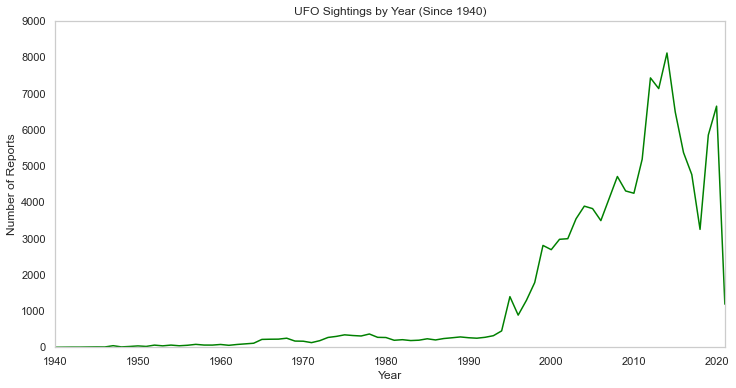

In [31]:
#Reports by year since 1940
sns.set_theme(palette = theme_all)
sns.set_style('whitegrid', {'axes.grid' : False})
fig2 = plt.figure(figsize = (12,6))
ax = fig2.add_subplot(1,1,1)
ufo_yearly.Year.count().plot.line(ax=ax,color='green')
plt.xlim(1940,2021)
plt.ylim(0,9000)
plt.ylabel('Number of Reports')
plt.xlabel('Year')
plt.title('UFO Sightings by Year (Since 1940)')

Text(0.5, 1.0, 'UFO Sightings by Decade (Since 1940)')

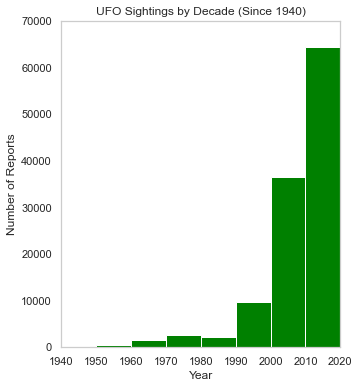

In [29]:
#Reports by decade 1940-2020
#sns.set_theme(palette = theme_all)
fig2 = plt.figure(figsize = (5,6))
ax = fig2.add_subplot(1,1,1)
dec_bins=[1940,1950,1960,1970,1980,1990,2000,2010,2020]
sns.set_style('whitegrid', {'axes.grid' : False})
ufo_data.Year.plot.hist(ax=ax,bins=dec_bins,color='green')
#sns.histplot(data=ufo_data.Year,ax=ax,bins=dec_bins,color='green')
plt.xlim(1940,2020)
plt.xticks(dec_bins)
plt.ylim(0,70000)
plt.ylabel('Number of Reports')
plt.xlabel('Year')
plt.title('UFO Sightings by Decade (Since 1940)')

Text(0.5, 1.0, 'UFO Sightings by Hour of Day')

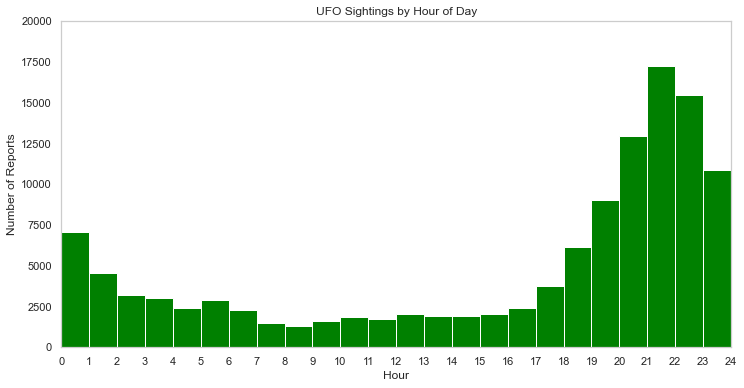

In [19]:
#Reports by hour of the day since 1940
fig2 = plt.figure(figsize = (12,6))
ax = fig2.add_subplot(1,1,1)
h_bins=[x for x in range(0,25)]
#sns.set_theme(palette = theme_all)
sns.set_style('whitegrid', {'axes.grid' : False})
ufo_data[ufo_data.Year >= 1940].Date_Time.dt.hour.plot.hist(ax=ax,bins=h_bins,color='green')
plt.xlim(h_bins[0],h_bins[-1])
plt.xticks(h_bins)
plt.ylim(0,20000)
plt.ylabel('Number of Reports')
plt.xlabel('Hour')
plt.title('UFO Sightings by Hour of Day')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

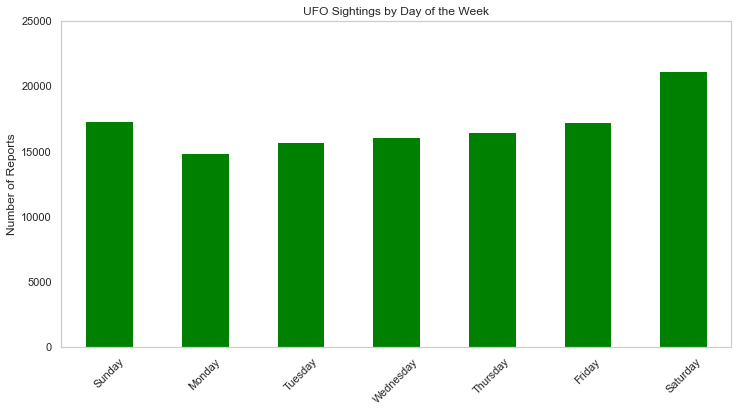

In [20]:
#Reports by day of the week since 1940
fig2 = plt.figure(figsize = (12,6))
ax = fig2.add_subplot(1,1,1)
dotw_list = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
#sns.set_theme(palette = theme_all)
sns.set_style('whitegrid', {'axes.grid' : False})
ufo_data.Day_Of_Week.value_counts().reindex(dotw_list, fill_value=0).plot.bar(color='green')
plt.ylim(0,25000)
plt.ylabel('Number of Reports')
plt.title('UFO Sightings by Day of the Week')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

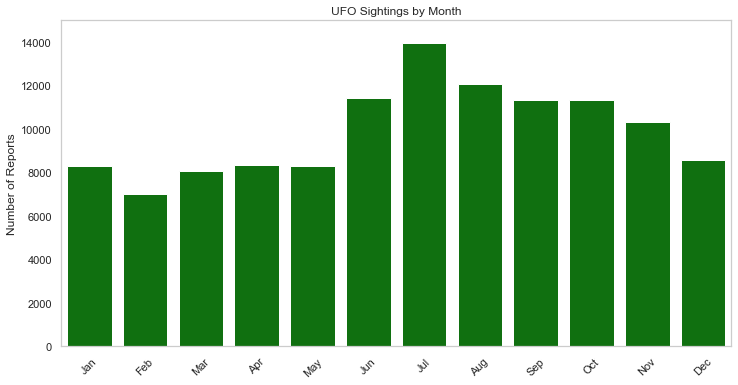

In [21]:
#Reports by day of the week since 1940
fig2 = plt.figure(figsize = (12,6))
ax = fig2.add_subplot(1,1,1)
month_labels_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ufo_data['Month_Names'] = ufo_data.Month.apply(lambda x: month_labels_list[x-1])
sns.set_style('whitegrid', {'axes.grid' : False})
#sns.barplot(x = month_labels_list, y = ufo_data.Month_Names.value_counts(),color='green')
sns.barplot(x = month_labels_list, y = [ufo_data.Month_Names[ufo_data.Month_Names==x].count() for x in month_labels_list], color = 'green')
plt.ylim(0,15000)
plt.ylabel('Number of Reports')
plt.title('UFO Sightings by Month')
plt.setp(month_labels_list)
plt.xticks(rotation=45)


Text(0.5, 1.0, 'UFO Sightings Pre/Post 1998')

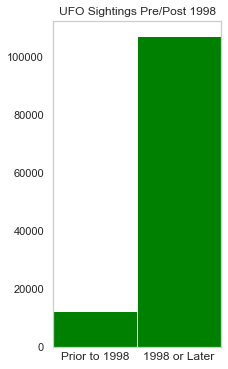

In [22]:
#Reports split by pre and post 1998 - exploratory analysis to justify narrowing time scope of later analyses.
fig2 = plt.figure(figsize = (3,6))
ax = fig2.add_subplot(1,1,1)
#sns.set_theme(palette = theme_all)
sns.set_style('whitegrid', {'axes.grid' : False})
counts = ax.hist(ufo_data.Year,bins=[1940,1998,2022],color='green')
plt.xlim(1996,2000)
ax.set_xticks([])
plt.grid(False)
#Customize labels
ax.annotate('Prior to 1998', xy=(1997, 0), xycoords=('data', 'axes fraction'), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
ax.annotate('1998 or Later', xy=(1999, 0), xycoords=('data', 'axes fraction'), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
#plt.tick_params(labelbottom='off')
#ufo_data.Year.plot.hist(ax=ax,color='green',bins=dec_bins)
#plt.xlim(1997,1999)
#plt.xticks(color='blank')
#plt.ylim(0,70000)
#plt.ylabel('Number of Reports')
#plt.xlabel('Year')
plt.title('UFO Sightings Pre/Post 1998')

In [10]:
ufo_post = pd.DataFrame(ufo_data)
ufo_post['Post_Delay'] = ufo_post['Posted'].dt.date - ufo_post['Date_Time'].dt.date
ufo_post['Post_Delay'] = ufo_post['Post_Delay'].apply(lambda x : max(0,x.days))
ufo_post['< 30 Days'] = ufo_post['Post_Delay'] < 30
ufo_post['30-89 Days'] = (ufo_post['Post_Delay'] >= 30) & (ufo_post['Post_Delay'] < 90)
ufo_post['90-365 Days'] = (ufo_post['Post_Delay'] >= 90) & (ufo_post['Post_Delay'] < 366)
ufo_post['> 365 Days'] = ufo_post['Post_Delay'] > 365

In [11]:
''' #OLD
ufo_post = pd.DataFrame(ufo_data)
ufo_post['Post_Delay'] = ufo_post['Posted'].dt.date - ufo_post['Date_Time'].dt.date
ufo_post['Post_Delay'] = ufo_post['Post_Delay'].apply(lambda x : max(0,x.days))

fig2 = plt.figure(figsize = (12,6))
ax = fig2.add_subplot(1,1,1)
del_bins = [0,30,90,180,365,1000]
ufo_post.Post_Delay.plot.hist(ax=ax,color='green',bins=del_bins)
sns.set_theme()
plt.xlim(0,1000)
plt.ylim(0,75000)
plt.xticks(del_bins)
plt.ylabel('Number of Reports')
plt.xlabel('Posting Delay (Days)')
plt.title('Time Delay in Posting Reports (Events Since 1950)')
'''
''

''

Text(0.5, 1.0, 'Report Posting Timeliness')

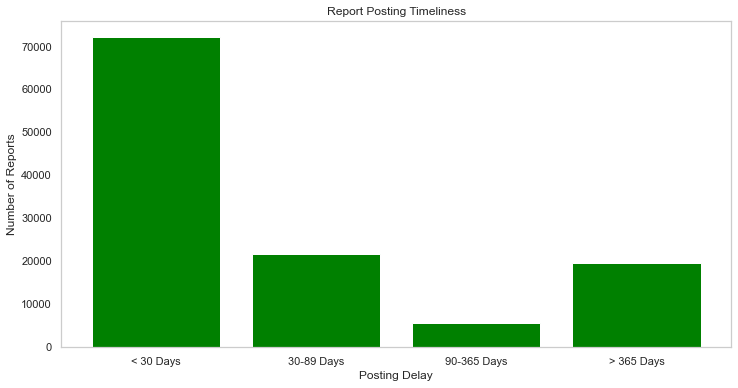

In [23]:
fig2 = plt.figure(figsize = (12,6))
ax = fig2.add_subplot(1,1,1)
labs = ['< 30 Days','30-89 Days','90-365 Days','> 365 Days']
vals = [ufo_post['< 30 Days'].sum(),ufo_post['30-89 Days'].sum(),ufo_post['90-365 Days'].sum(),ufo_post['> 365 Days'].sum()]
sns.set_style('whitegrid', {'axes.grid' : False})
#sns.set_theme(palette = theme_all)
plt.bar(x=labs, height=vals,color='green')
plt.ylabel('Number of Reports')
plt.xlabel('Posting Delay')
plt.title('Report Posting Timeliness')

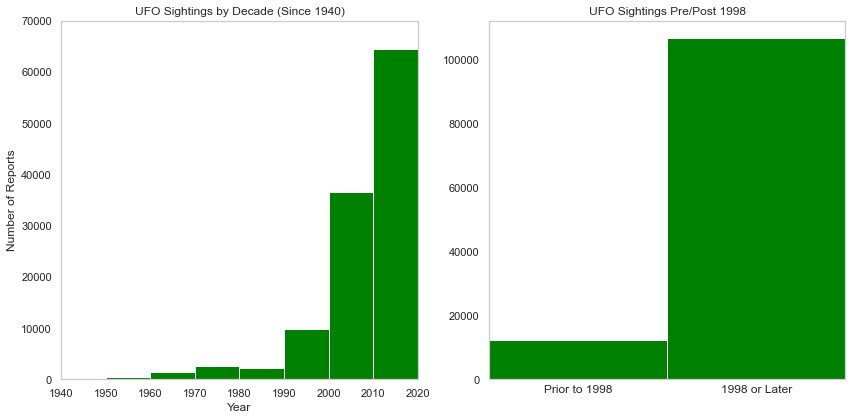

In [25]:
#Reports split by pre and post 1998 - exploratory analysis to justify narrowing time scope of later analyses.
fig2 = plt.figure(figsize = (12,6))
ax = fig2.add_subplot(1,2,1)
dec_bins=[1940,1950,1960,1970,1980,1990,2000,2010,2020]
sns.set_style('whitegrid', {'axes.grid' : False})
ufo_data.Year.plot.hist(ax=ax,bins=dec_bins,color='green')
#sns.histplot(data=ufo_data.Year,ax=ax,bins=dec_bins,color='green')
plt.xlim(1940,2020)
plt.xticks(dec_bins)
plt.ylim(0,70000)
plt.ylabel('Number of Reports')
plt.xlabel('Year')
plt.title('UFO Sightings by Decade (Since 1940)')


ax = fig2.add_subplot(1,2,2)
#sns.set_theme(palette = theme_all)
counts = ax.hist(ufo_data.Year,bins=[1940,1998,2022],color='green')
plt.xlim(1996,2000)
ax.set_xticks([])
#Customize labels
ax.annotate('Prior to 1998', xy=(1997, 0), xycoords=('data', 'axes fraction'), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
ax.annotate('1998 or Later', xy=(1999, 0), xycoords=('data', 'axes fraction'), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
#plt.tick_params(labelbottom='off')
#ufo_data.Year.plot.hist(ax=ax,color='green',bins=dec_bins)
#plt.xlim(1997,1999)
#plt.xticks(color='blank')
#plt.ylim(0,70000)
#plt.ylabel('Number of Reports')
#plt.xlabel('Year')
plt.title('UFO Sightings Pre/Post 1998')

fig2.tight_layout()